In [1]:
import pybuild as pb
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import pybinding
from pybinding.repository import group6_tmd


### Primer Test: Red cuadrada

In [2]:
d = 0.2  # [nm] unit cell length
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
a1=[d, 0]
a2=[0, d]
atom = ('A', [0, 0])
squaremine = pb.Unitary("squaremine",vec1=a1,vec2=a2)
squaremine.BuildLat()
squaremine.SetTimeDepOrbital(atom)
squaremine.SetTimeDepHoppings(([0, 1], 'A', 'A', t),([1, 0], 'A', 'A', t))
squaremine.CreateFolder()
squaremine.FlushLatticeBasics()
squaremine.FlushSublattices()
squaremine.FlushHoppings()
squaremine.FlushOperators()

### Segundo Test: Graphene

[('A', [0, -0.071]), ('B', [0, 0.071])]
[([0, 0], 'A', 'B', [-2.8]), ([1, -1], 'A', 'B', [-2.8]), ([0, -1], 'A', 'B', [-2.8])]


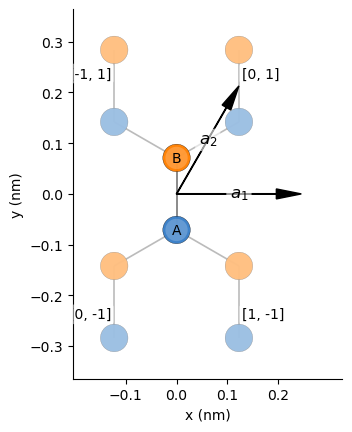

In [3]:
a = 0.24595   # [nm] unit cell length
a_cc = 0.142  # [nm] carbon-carbon distance
t = -2.8      # [eV] nearest neighbour hopping
graphenemine = pb.Unitary()### This time we are testing the getters and setters
graphenemine.Name = "graphene"
graphenemine.Vec1 = [a, 0]
graphenemine.Vec2 = [a/2, a/2 * np.sqrt(3)]
graphenemine.BuildLat()
graphenemine.SetTimeDepOrbitals(('A', [0, -a_cc/2]),('B', [0,  a_cc/2]))
graphenemine.SetTimeDepHoppings(([0,  0], 'A', 'B', [t]),([1, -1], 'A', 'B', [t]),([0, -1], 'A', 'B', [t]))
graphenemine.PbLat.plot()
print(graphenemine.FuncSublat)
print(graphenemine.FuncHoppings)

### Ahora hacemos el test de los operadores

In [4]:
a = 0.24595   # [nm] unit cell length
a_cc = 0.142  # [nm] carbon-carbon distance
t = -2.8      # [eV] nearest neighbour hopping
graphenemine = pb.Unitary()### This time we are testing the getters and setters
graphenemine.Name = "graphene"
graphenemine.Vec1 = [a, 0]
graphenemine.Vec2 = [a/2, a/2 * np.sqrt(3)]
graphenemine.BuildLat()
graphenemine.SetTimeDepOrbitals(('A', [0, -a_cc/2]),('B', [0,  a_cc/2]))
graphenemine.SetTimeDepHoppings(([0,  0], 'A', 'B', t),([1, -1], 'A', 'B', t),([0, -1], 'A', 'B', t))
graphenemine.CreateOperator("SpinSz")
graphene = graphenemine.PbLat

In [5]:
ids ={}
for name, sub in graphene.sublattices.items():
    if(not ids.get(str(sub.unique_id),None)):
        ids[str(sub.unique_id)]  = name

print(ids)


for name, hop in graphene.hoppings.items():
    for term in hop.terms:
        print(name,term.relative_index, term.from_id, term.to_id,hop.energy)



{'1': 'B', '0': 'A'}
__anonymous__0 [0 0 0] 0 1 [[-2.8+0.j]]
__anonymous__0 [ 1 -1  0] 0 1 [[-2.8+0.j]]
__anonymous__0 [ 0 -1  0] 0 1 [[-2.8+0.j]]


### Ahora hacemos el test para el graphene Spinfull

In [17]:
a = 0.24595   # [nm] unit cell length
a_cc = 0.142  # [nm] carbon-carbon distance
t = -2.8      # [eV] nearest neighbour hopping
sigma_z = np.array([[1,0],[0,-1]],dtype=float)
Xc=0.0
graphenespinful = pb.Unitary()
graphenespinful.Vec1 = [a,0]
graphenespinful.Vec2 = [a/2, a/2 * np.sqrt(3)]
graphenespinful.BuildLat()
graphenespinful.SetTimeDepOrbitals(('A', [0, -a_cc/2],sigma_z*Xc),('B', [0,  a_cc/2],sigma_z*Xc))
graphenespinful.SetTimeDepHoppings(([0,  0], 'A', 'B', t*np.eye(2)),([1, -1], 'A', 'B', t*np.eye(2)),([0, -1], 'A', 'B', t*np.eye(2)))
graphenespinful.CreateOperator("SpinSz")
graphenespinful.SetOperatorOrbitals("SpinSz",('A', [0, -a_cc/2],sigma_z),('B', [0,  a_cc/2],sigma_z))

In [18]:

Szmat = graphenespinful.PbOperators["SpinSz"]
for name, sublat in Szmat.sublattices.items():
    print(name,sublat,sublat.energy)

B <_pybinding.Sublattice object at 0x7f3121ff1bb0> [[ 1.+0.j  0.+0.j]
 [ 0.-0.j -1.+0.j]]
A <_pybinding.Sublattice object at 0x7f3121ff19f0> [[ 1.+0.j  0.+0.j]
 [ 0.-0.j -1.+0.j]]


### New test graphene Spinful individual Lattices

In [8]:
a = 0.24595   # [nm] unit cell length
a_cc = 0.142  # [nm] carbon-carbon distance
t = -2.8      # [eV] nearest neighbour hopping
sigma_z = np.array([[1,0],[0,-1]])
Xc=0.1

grapheneSind= pb.Unitary()
grapheneSind.Vec1 = [a,0]
grapheneSind.Vec2 = [a/2, a/2 * np.sqrt(3)]
grapheneSind.BuildLat()
grapheneSind.SetTimeDepOrbitals(('A-Up', [0, -a_cc/2],Xc),('A-Dwn', [0, -a_cc/2],-Xc),('B-Up', [0,  -a_cc/2],Xc),('B-Dwn', [0,  -a_cc/2],-Xc))
grapheneSind.SetTimeDepHoppings(([0,  0], 'A-Up', 'B-Up', t),([1, -1], 'A-Up', 'B-Up', t),([0, -1], 'A-Up', 'B-Up', t),([0,  0], 'A-Dwn', 'B-Dwn', t),([1, -1], 'A-Dwn', 'B-Dwn', t),([0, -1], 'A-Dwn', 'B-Dwn', t))
grapheneSind.CreateOperator("SpinSz")
grapheneSind.SetOperatorOrbitals("SpinSz",('A-Up', [0, -a_cc/2],[[1]]),('A-Dwn', [0, -a_cc/2],[[-1]]),('B-Up', [0,  -a_cc/2],[[1]]),('B-Dwn', [0,  -a_cc/2],[[-1]]))
grapheneSind.CreateFolder()
grapheneSind.FlushLatticeBasics()
grapheneSind.FlushSublattices()

#### Ahora vamos a expulsar todo en el json

In [9]:
a = 0.24595   # [nm] unit cell length
a_cc = 0.142  # [nm] carbon-carbon distance
t = -2.71      # [eV] nearest neighbour hopping
sigma_z = np.array([[1,0],[0,-1]],dtype=complex)
sigma_y = np.array([[0,-1j],[1j,0]],dtype=complex)
sigma_x = np.array([[0,1],[1,0]],dtype=complex)
Xc=0.0
t2 = 0.4*t*0
LambdaRSOC=10e-3

RSOC = 2.0j*LambdaRSOC/3.
e1 = np.array([0, a_cc,0])
e2 = e1+ np.array([a, 0,0]) - np.array([a/2, a/2 * np.sqrt(3),0])
e3 = e1- np.array([a/2, a/2 * np.sqrt(3),0])
e1/=np.linalg.norm(e1)
e2/=np.linalg.norm(e2)
e3/=np.linalg.norm(e3)
graphenespinful = pb.Unitary()
graphenespinful.Name="GrapheneSpinful"
graphenespinful.Vec1 = [a,0]
graphenespinful.Vec2 = [a/2, a/2 * np.sqrt(3)]
graphenespinful.BuildLat()
graphenespinful.SetTimeDepOrbitals(('A', [0, -a_cc/2],sigma_z*Xc),('B', [0,  a_cc/2],sigma_z*Xc))
graphenespinful.SetTimeDepHoppings(
        ([0,  0], 'A', 'B', t*np.eye(2) + RSOC*(e1[1]*sigma_x-e1[0]*sigma_y)),
        ([1, -1], 'A', 'B', t*np.eye(2) + RSOC*(e2[1]*sigma_x-e2[0]*sigma_y)),
        ([0, -1], 'A', 'B', t*np.eye(2) + RSOC*(e3[1]*sigma_x-e3[0]*sigma_y)),
        ([1, 0], 'A', 'A', t2 * 1j*sigma_z),
        ([0, -1], 'A', 'A', t2 * 1j*sigma_z),
        ([-1, 1], 'A', 'A', t2 * 1j*sigma_z),
        ([1, 0], 'B', 'B', t2 * -1j*sigma_z),
        ([0, -1], 'B', 'B', t2 * -1j*sigma_z),
        ([-1, 1], 'B', 'B', t2 * -1j*sigma_z),
        )
graphenespinful.CreateOperator("SpinSz")
graphenespinful.SetOperatorOrbitals("SpinSz",('A', [0, -a_cc/2],0.5*sigma_z),('B', [0,  a_cc/2],0.5*sigma_z))
graphenespinful.CreateOperator("SpinSy")
graphenespinful.SetOperatorOrbitals("SpinSy",('A', [0, -a_cc/2],sigma_y),('B', [0,  a_cc/2],0.5*sigma_y))
graphenespinful.CreateOperator("SzUpProj")
graphenespinful.SetOperatorOrbitals("SzUpProj",('A', [0, -a_cc/2],np.array([[1,0],[0,0]])),('B', [0,  a_cc/2],np.array([[1,0],[0,0]])))
graphenespinful.CreateOperator("SzDwnProj")
graphenespinful.SetOperatorOrbitals("SzDwnProj",('A', [0, -a_cc/2],np.array([[0,0],[0,1]])),('B', [0,  a_cc/2],np.array([[0,0],[0,1]])))
graphenespinful.CreateFolder()
graphenespinful.FlushLatticeBasics()
graphenespinful.FlushSublattices()
graphenespinful.FlushHoppings()
graphenespinful.FlushOperators()


### Ahora implementaremos el modelo de Haldane

In [10]:
a = 0.24595   # [nm] unit cell length
a_cc = a/np.sqrt(3)  # [nm] carbon-carbon distance
t = -1      # [eV] nearest neighbours
#t2 = 0.125*t/2    #[eV] second nearet neighbour hopping
t2 = 0.1*t
m=0.0
haldane = pb.Unitary()
haldane.Name = "HaldaneModel"
haldane.Vec1 = [a,0]
haldane.Vec2 = [a/2, a/2 * np.sqrt(3)]
haldane.BuildLat()
haldane.SetOrbitals(('A', [0, -a_cc/2],m),('B', [0,  a_cc/2],-m))
haldane.SetHoppings(
        ([0,  0], 'A', 'B', t),
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t),
        #second nearest neighbour hoppigns
        ([1, 0], 'A', 'A', t2 * 1j),
        ([0, -1], 'A', 'A', t2 * 1j),
        ([-1, 1], 'A', 'A', t2 * 1j),
        ([1, 0], 'B', 'B', t2 * -1j),
        ([0, -1], 'B', 'B', t2 * -1j),
        ([-1, 1], 'B', 'B', t2 * -1j))

haldane.CreateFolder()
haldane.FlushLatticeBasics()
haldane.FlushSublattices()
haldane.FlushHoppings()


### Ahora debugaremos el modelo de tres bandas del TMD para confirmar esto y terminar de implementar los operadores dependientes del tiempo

In [11]:
_default_3band_params = {  # from https://doi.org/10.1103/PhysRevB.88.085433
    # ->           a,  eps1,  eps2,     t0,    t1,    t2,   t11,   t12,    t22
    "MoS2":  [0.3190, 1.046, 2.104, -0.184, 0.401, 0.507, 0.218, 0.338,  0.057],
    "WS2":   [0.3191, 1.130, 2.275, -0.206, 0.567, 0.536, 0.286, 0.384, -0.061],
    "MoSe2": [0.3326, 0.919, 2.065, -0.188, 0.317, 0.456, 0.211, 0.290,  0.130],
    "WSe2":  [0.3325, 0.943, 2.179, -0.207, 0.457, 0.486, 0.263, 0.329,  0.034],
    "MoTe2": [0.3557, 0.605, 1.972, -0.169, 0.228, 0.390, 0.207, 0.239,  0.252],
    "WTe2":  [0.3560, 0.606, 2.102, -0.175, 0.342, 0.410, 0.233, 0.270,  0.190],
}

def tmdmodel(name, override_params=None):
    params = _default_3band_params.copy()
    if override_params:
        params.update(override_params)

    a, eps1, eps2, t0, t1, t2, t11, t12, t22 = params[name]
    rt3 = np.sqrt(3)  # convenient constant
    tmd = pb.Unitary()
    tmd.Name =name
    tmd.Vec1 = [a, 0]
    tmd.Vec2 = [1./2 * a, rt3/2 * a]
    tmd.BuildLat()
    metal_name, chalcogenide_name =re.findall("[A-Z][a-z]*", name)
    tmd.SetOrbital((metal_name, [0, 0], [eps1, eps2, eps2]))
    h1 = [[ t0, -t1,   t2],
          [ t1, t11, -t12],
          [ t2, t12,  t22]]

    h2 = [[                    t0,     1/2 * t1 + rt3/2 * t2,     rt3/2 * t1 - 1/2 * t2],
          [-1/2 * t1 + rt3/2 * t2,     1/4 * t11 + 3/4 * t22, rt3/4 * (t11 - t22) - t12],
          [-rt3/2 * t1 - 1/2 * t2, rt3/4 * (t11 - t22) + t12,     3/4 * t11 + 1/4 * t22]]

    h3 = [[                    t0,    -1/2 * t1 - rt3/2 * t2,     rt3/2 * t1 - 1/2 * t2],
          [ 1/2 * t1 - rt3/2 * t2,     1/4 * t11 + 3/4 * t22, rt3/4 * (t22 - t11) + t12],
          [-rt3/2 * t1 - 1/2 * t2, rt3/4 * (t22 - t11) - t12,     3/4 * t11 + 1/4 * t22]]

    m = metal_name
    tmd.SetHoppings(([1,  0], m, m, h1),
                     ([0, -1], m, m, h2),
                     ([1, -1], m, m, h3))
    tmd.CreateOperator("Lz")
    e0=[[0,0,0],
        [0,0,2*1j],
        [0,-2*1j,0]]
    tmd.SetOperatorOrbitals("Lz",((metal_name, [0, 0], e0)))
    return tmd


TMD = tmdmodel("MoS2")

TMD.CreateFolder()
TMD.FlushLatticeBasics()
TMD.FlushSublattices()
TMD.FlushHoppings()
TMD.FlushOperators()


##

### Ahora pondremos el tmd en la base de Lz

In [12]:
_default_3band_params = {  # from https://doi.org/10.1103/PhysRevB.88.085433
    # ->           a,  eps1,  eps2,     t0,    t1,    t2,   t11,   t12,    t22
    "MoS2":  [0.3190, 1.046, 2.104, -0.184, 0.401, 0.507, 0.218, 0.338,  0.057],
    "WS2":   [0.3191, 1.130, 2.275, -0.206, 0.567, 0.536, 0.286, 0.384, -0.061],
    "MoSe2": [0.3326, 0.919, 2.065, -0.188, 0.317, 0.456, 0.211, 0.290,  0.130],
    "WSe2":  [0.3325, 0.943, 2.179, -0.207, 0.457, 0.486, 0.263, 0.329,  0.034],
    "MoTe2": [0.3557, 0.605, 1.972, -0.169, 0.228, 0.390, 0.207, 0.239,  0.252],
    "WTe2":  [0.3560, 0.606, 2.102, -0.175, 0.342, 0.410, 0.233, 0.270,  0.190],
}

def tmdmodel(name, override_params=None):
    params = _default_3band_params.copy()
    if override_params:
        params.update(override_params)

    a, eps1, eps2, t0, t1, t2, t11, t12, t22 = params[name]
    rt3 = np.sqrt(3)  # convenient constant
    tmd = pb.Unitary()
    tmd.Name =name+"LzBasis"
    tmd.Vec1 = [a, 0]
    tmd.Vec2 = [1./2 * a, rt3/2 * a]
    tmd.BuildLat()
    metal_name, chalcogenide_name =re.findall("[A-Z][a-z]*", name)
    tmd.SetOrbital((metal_name, [0, 0], [eps1, eps2, eps2]))
    #change of basis#
    u = np.asarray([[1,0,0],[0,1.j/np.sqrt(2.),-1.j/np.sqrt(2.)],[0,1./np.sqrt(2.),1./np.sqrt(2.)]])
    udag = np.transpose(np.conjugate(u))
    
    h1 = [[ t0, -t1,   t2],
          [ t1, t11, -t12],
          [ t2, t12,  t22]]

    h2 = [[                    t0,     1/2 * t1 + rt3/2 * t2,     rt3/2 * t1 - 1/2 * t2],
          [-1/2 * t1 + rt3/2 * t2,     1/4 * t11 + 3/4 * t22, rt3/4 * (t11 - t22) - t12],
          [-rt3/2 * t1 - 1/2 * t2, rt3/4 * (t11 - t22) + t12,     3/4 * t11 + 1/4 * t22]]

    h3 = [[                    t0,    -1/2 * t1 - rt3/2 * t2,     rt3/2 * t1 - 1/2 * t2],
          [ 1/2 * t1 - rt3/2 * t2,     1/4 * t11 + 3/4 * t22, rt3/4 * (t22 - t11) + t12],
          [-rt3/2 * t1 - 1/2 * t2, rt3/4 * (t22 - t11) - t12,     3/4 * t11 + 1/4 * t22]]

    m = metal_name
    
    rh1 = np.matmul(udag,np.matmul(h1,u))
    rh2 = np.matmul(udag,np.matmul(h2,u))
    rh3 = np.matmul(udag,np.matmul(h3,u))
    tmd.SetHoppings(([1,  0], m, m, rh1),
                     ([0, -1], m, m, rh2),
                     ([1, -1], m, m, rh3))
    tmd.CreateOperator("Lz")
    e0=[[0,0,0],
        [0,0,2*1j],
        [0,-2*1j,0]]
    
    re0 = np.matmul(udag,np.matmul(e0,u))
    
    tmd.SetOperatorOrbitals("Lz",((metal_name, [0, 0], re0)))
    #tmd.SetOperatorOrbitals("Lz",((metal_name, [0, 0], np.eye(3))))
    mat = np.zeros((3,3))
    mat[1,1] = 1
    tmd.CreateOperator("ProjLzUp")
    tmd.SetOperatorOrbitals("ProjLzUp",((metal_name, [0, 0], mat)))
    mat = np.zeros((3,3))
    mat[2,2] = 1
    tmd.CreateOperator("ProjLzDwn")
    tmd.SetOperatorOrbitals("ProjLzDwn",((metal_name, [0, 0], mat)))
    mat = np.zeros((3,3))
    mat[0,0] = 1
    tmd.CreateOperator("ProjLzZero")
    tmd.SetOperatorOrbitals("ProjLzZero",((metal_name, [0, 0], mat)))
    return tmd


TMD = tmdmodel("MoS2")

TMD.CreateFolder()
TMD.FlushLatticeBasics()
TMD.FlushSublattices()
TMD.FlushHoppings()
TMD.FlushOperators()


### Debug for computing the projected density of states to check the orbital character

In [13]:
def monolayer_3band(name, override_params=None):
    r"""Monolayer of a group 6 TMD using the nearest-neighbor 3-band model
    Parameters
    ----------
    name : str
        Name of the TMD to model. The available options are: MoS2, WS2, MoSe2,
        WSe2, MoTe2, WTe2. The relevant tight-binding parameters for these 
        materials are given by https://doi.org/10.1103/PhysRevB.88.085433.
    override_params : Optional[dict]
        Replace or add new material parameters. The dictionary entries must 
        be in the format `"name": [a, eps1, eps2, t0, t1, t2, t11, t12, t22]`.
    Examples
    --------
    .. plot::
        :context: reset
        :alt: Molybdenum disulfide: unit cell for the nearest-neighbor 3-band model
        from pybinding.repository import group6_tmd
        group6_tmd.monolayer_3band("MoS2").plot()
    .. plot::
        :context: close-figs
        :alt: Molybdenum disulfide: 3-band model band structure
        model = pb.Model(group6_tmd.monolayer_3band("MoS2"), pb.translational_symmetry())
        solver = pb.solver.lapack(model)
        k_points = model.lattice.brillouin_zone()
        gamma = [0, 0]
        k = k_points[0]
        m = (k_points[0] + k_points[1]) / 2
        plt.figure(figsize=(6.7, 2.3))
        plt.subplot(121, title="MoS2 3-band model band structure")
        bands = solver.calc_bands(gamma, k, m, gamma)
        bands.plot(point_labels=[r"$\Gamma$", "K", "M", r"$\Gamma$"])
        plt.subplot(122, title="Band structure path in reciprocal space")
        model.lattice.plot_brillouin_zone(decorate=False)
        bands.plot_kpath(point_labels=[r"$\Gamma$", "K", "M", r"$\Gamma$"])
    .. plot::
        :context: close-figs
        :alt: Band structure of various group 6 TMDs: MoS2, WS2, MoSe2, WSe2, MoTe2, WTe2
        grid = plt.GridSpec(3, 2, hspace=0.4)
        plt.figure(figsize=(6.7, 8))
        for square, name in zip(grid, ["MoS2", "WS2", "MoSe2", "WSe2", "MoTe2", "WTe2"]):
            model = pb.Model(group6_tmd.monolayer_3band(name), pb.translational_symmetry())
            solver = pb.solver.lapack(model)
            k_points = model.lattice.brillouin_zone()
            gamma = [0, 0]
            k = k_points[0]
            m = (k_points[0] + k_points[1]) / 2
            plt.subplot(square, title=name)
            bands = solver.calc_bands(gamma, k, m, gamma)
            bands.plot(point_labels=[r"$\Gamma$", "K", "M", r"$\Gamma$"], lw=1.5)
    """
    params = _default_3band_params.copy()
    if override_params:
        params.update(override_params)

    a, eps1, eps2, t0, t1, t2, t11, t12, t22 = params[name]
    rt3 = math.sqrt(3)  # convenient constant

    lat = pybinding.Lattice(a1=[a, 0], a2=[1/2 * a, rt3/2 * a])

    metal_name, chalcogenide_name = re.findall("[A-Z][a-z]*", name)
    
    lat.add_one_sublattice(metal_name+"Dz2", [0, 0], eps1)
    lat.add_one_sublattice(metal_name+"Dxy", [0, 0], eps2)
    lat.add_one_sublattice(metal_name+"Dx2y2", [0, 0], eps2)

    h1 = [[ t0, -t1,   t2],
          [ t1, t11, -t12],
          [ t2, t12,  t22]]

    h2 = [[                    t0,     1/2 * t1 + rt3/2 * t2,     rt3/2 * t1 - 1/2 * t2],
          [-1/2 * t1 + rt3/2 * t2,     1/4 * t11 + 3/4 * t22, rt3/4 * (t11 - t22) - t12],
          [-rt3/2 * t1 - 1/2 * t2, rt3/4 * (t11 - t22) + t12,     3/4 * t11 + 1/4 * t22]]

    h3 = [[                    t0,    -1/2 * t1 - rt3/2 * t2,     rt3/2 * t1 - 1/2 * t2],
          [ 1/2 * t1 - rt3/2 * t2,     1/4 * t11 + 3/4 * t22, rt3/4 * (t22 - t11) + t12],
          [-rt3/2 * t1 - 1/2 * t2, rt3/4 * (t22 - t11) - t12,     3/4 * t11 + 1/4 * t22]]

    h1 = np.array(h1)
    h2 = np.array(h2)
    h3 = np.array(h3)
    m = metal_name
    
    lat.add_hoppings(([1,  0], m+"Dz2", m+"Dz2", h1[0,0]),
                     ([1,  0], m+"Dz2", m+"Dxy", h1[0,1]),
                     ([1,  0], m+"Dz2", m+"Dx2y2", h1[0,2]),
                     ([1,  0], m+"Dxy", m+"Dz2", h1[1,0]),
                     ([1,  0], m+"Dxy", m+"Dxy", h1[1,1]),
                     ([1,  0], m+"Dxy", m+"Dx2y2", h1[1,2]),
                     ([1,  0], m+"Dx2y2", m+"Dz2", h1[2,0]),
                     ([1,  0], m+"Dx2y2", m+"Dxy", h1[2,1]),
                     ([1,  0], m+"Dx2y2", m+"Dx2y2", h1[2,2]),
                     ###Second neighbour
                     ([0,  -1], m+"Dz2", m+"Dz2", h2[0,0]),
                     ([0,  -1], m+"Dz2", m+"Dxy", h2[0,1]),
                     ([0,  -1], m+"Dz2", m+"Dx2y2", h2[0,2]),
                     ([0,  -1], m+"Dxy", m+"Dz2", h2[1,0]),
                     ([0,  -1], m+"Dxy", m+"Dxy", h2[1,1]),
                     ([0,  -1], m+"Dxy", m+"Dx2y2", h2[1,2]),
                     ([0,  -1], m+"Dx2y2", m+"Dz2", h2[2,0]),
                     ([0,  -1], m+"Dx2y2", m+"Dxy", h2[2,1]),
                     ([0,  -1], m+"Dx2y2", m+"Dx2y2", h2[2,2]),
                     
                     ###Third neighbour
                     ([1,  -1], m+"Dz2", m+"Dz2", h3[0,0]),
                     ([1,  -1], m+"Dz2", m+"Dxy", h3[0,1]),
                     ([1,  -1], m+"Dz2", m+"Dx2y2", h3[0,2]),
                     ([1,  -1], m+"Dxy", m+"Dz2", h3[1,0]),
                     ([1,  -1], m+"Dxy", m+"Dxy", h3[1,1]),
                     ([1,  -1], m+"Dxy", m+"Dx2y2", h3[1,2]),
                     ([1,  -1], m+"Dx2y2", m+"Dz2", h3[2,0]),
                     ([1,  -1], m+"Dx2y2", m+"Dxy", h3[2,1]),
                     ([1,  -1], m+"Dx2y2", m+"Dx2y2", h3[2,2]),
                     )
    return lat

In [14]:
tmdsingle = monolayer_3band("MoS2")
tmd = group6_tmd.monolayer_3band("MoS2")

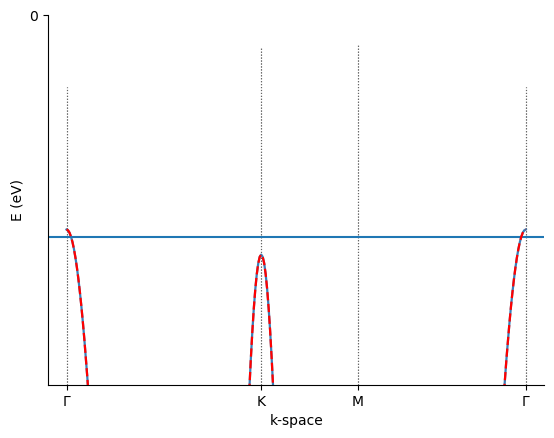

In [15]:
model = pybinding.Model(tmd, pybinding.translational_symmetry())
solver = pybinding.solver.lapack(model)
modelsingle = pybinding.Model(tmdsingle, pybinding.translational_symmetry())
solversingle = pybinding.solver.lapack(modelsingle)


k_points = model.lattice.brillouin_zone()
gamma = [0, 0]
k = k_points[0]
m = (k_points[0] + k_points[1]) / 2
bands = solver.calc_bands(gamma, k, m, gamma)
bands.plot(point_labels=[r"$\Gamma$", "K", "M", r"$\Gamma$"],ls="--",zorder=3,color="r")

bandssingle = solversingle.calc_bands(gamma, k, m, gamma)
bandssingle.plot(point_labels=[r"$\Gamma$", "K", "M", r"$\Gamma$"])


plt.ylim(-0.1,0.0)
plt.axhline(y=-0.06)

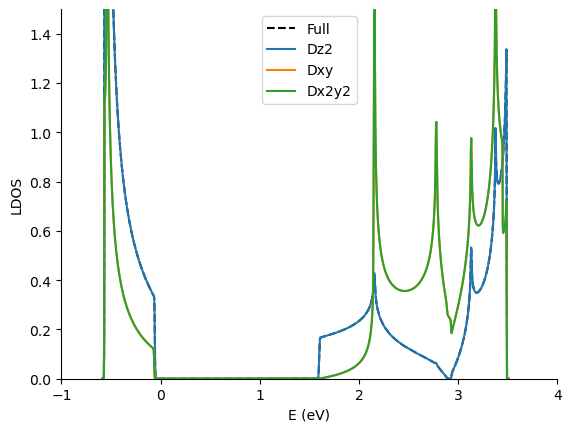

In [16]:
sqmodel = pybinding.Model(tmdsingle,pybinding.rectangle(160,160))
kpm = pybinding.kpm(sqmodel)
dos = kpm.calc_ldos(energy=np.linspace(-5., 5.7, 3500), broadening=0.005,position=[0,0])
dos.plot(label="Full",ls="--",color="k")
dosz2 = kpm.calc_ldos(energy=np.linspace(-5., 5.7, 3500), broadening=0.005,position=[0,0],sublattice="MoDz2")
dosz2.plot(label="Dz2")
dosxy = kpm.calc_ldos(energy=np.linspace(-5., 5.7, 3500), broadening=0.005,position=[0,0],sublattice="MoDxy")
dosxy.plot(label="Dxy")
dosx2y2 = kpm.calc_ldos(energy=np.linspace(-5., 5.7, 3500), broadening=0.005,position=[0,0],sublattice="MoDx2y2")
dosx2y2.plot(label="Dx2y2")
plt.xlim(-1,4)
plt.ylim(0,1.5)
plt.legend()

